In [1]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2
%load_ext pyinstrument

import sys
sys.path.insert(0,'..')


In [2]:
#imports 
import os
import numpy as np
import pandas as pd
import torchvision.transforms as T
import matplotlib.image as mpimg

from src.utils import plot_image, plot_im, save_im


In [4]:
# data_location='/home/salnabulsi/coat-of-arms/data/cropped_coas/out_valid'
# data_location='/home/salnabulsi/coat-of-arms/data/cropped_coas/out'
# data_location='/Users/salnabulsi/tub/coat-of-arms/data/cropped_coas/out_valid'

# data_location='/Users/salnabulsi/tub/coat-of-arms/data/cropped_coas/out'
data_location='/home/salnabulsi/coat-of-arms/data/new'

test_caption_file  = data_location + '/test_real_captions_psumsq.txt'
root_folder_images = data_location + '/images/'
# root_folder_images = data_location + '/images/resized/'

df = pd.read_csv(test_caption_file)

print("There are {} test images".format(len(df)))

df

There are 177 test images


,image,caption,psum,psum_sq
0,6423_G A cross.jpg,G A cross,19754.472656,15046.065430
1,1739_A G cross patonce.jpg,A G cross patonce,18735.156250,14356.203125
2,2870_O S lion rampant.jpg,O S lion rampant,15362.364258,9554.638672
3,18746_S A eagle.jpg,S A eagle,13549.989258,9141.958984
4,29836_G O 3 eagles.jpg,G O 3 eagles,16778.851562,13274.360352
...,...,...,...,...
172,29394_G O eagle doubleheaded.jpg,G O eagle doubleheaded,15421.950195,11365.047852
173,398_A S lion rampant.jpg,A S lion rampant,18646.660156,14093.865234
174,4459_B O eagle.jpg,B O eagle,17065.537109,11514.578125
175,5302_O B cross moline.jpg,O B cross moline,18390.984375,13203.470703


In [5]:
ls = []
ims_size = []
for im_name in df['image']:
    image_full_path = root_folder_images + '/' + im_name
    img = mpimg.imread(image_full_path)
    trans = T.ToTensor()
    img_t = trans(img)
    ls.append( img_t.shape )
# ls

/home/salnabulsi/.thesis-py38/lib/python3.8/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [6]:
hist, bin_edges = np.histogram(ls)
hist, bin_edges

(array([189,   7, 213,  98,  16,   0,   4,   2,   0,   2]),
 array([   3. ,  213.2,  423.4,  633.6,  843.8, 1054. , 1264.2, 1474.4,
        1684.6, 1894.8, 2105. ]))

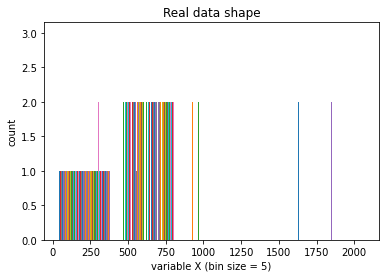

In [7]:
import numpy as np
import random
from matplotlib import pyplot as plt

plt.hist(ls, 5)

# plt.hist(bins, bins=hist, alpha=0.5)
plt.title('Real data shape')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()
